## K Nearest Neighbour

#### Objective: 
The objective of this assignment is to implement and evaluate the K-Nearest Neighbours algorithm for classification using the given datasets

**Dataset:**
Need to Classify the animal type

**Tasks:**
1. Analyse the data using the visualizations
2. Preprocess the data by handling missing values & Outliers, if any.
3. Split the dataset into training and testing sets (80% training, 20% testing).
4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset
5. Choose an appropriate distance metric and value for K.
6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.
7. Visualize the decision boundaries of the classifier.


### Import required libraries

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

### Import Dataset 

In [105]:
## Original Dataset
dataset = pd.read_csv('Zoo.csv')

In [106]:
df = dataset.copy()

In [107]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


### Data Preprocessing

In [108]:
df.shape

(101, 18)

In [109]:
df.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [110]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [111]:
df['animal name'].value_counts()

animal name
frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: count, Length: 100, dtype: int64

In [112]:
df['type'].value_counts()

type
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64

In [113]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* All the features contains the information about the animal characteristics, with numerical values
* There is no presence of any of the missing values in any of the features.
* Except animal name all other features are of integer data type
* type is target features which is a multiclass classifiaction type. 

<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

### Visualization

<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* From the pairplot we can see that all the features are almost noramlly distributed.
* The data points are closer to the mean values for the features

<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

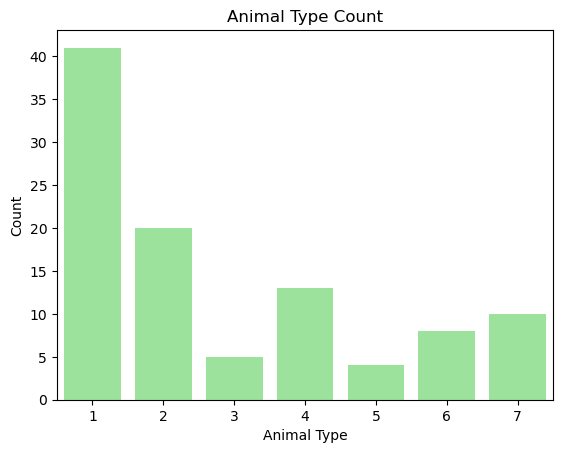

In [114]:
sns.countplot(x=df['type'], color='lightgreen')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.title('Animal Type Count')
plt.show()

<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* The countplot shows that there are more number of animals fal into type 1 and 2.
* The count of Type 4 and 7 is more after animal type 1 and 2
* Type 3, 5 and 6 are likely to be less 

<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

In [115]:
## Animal Characteristics

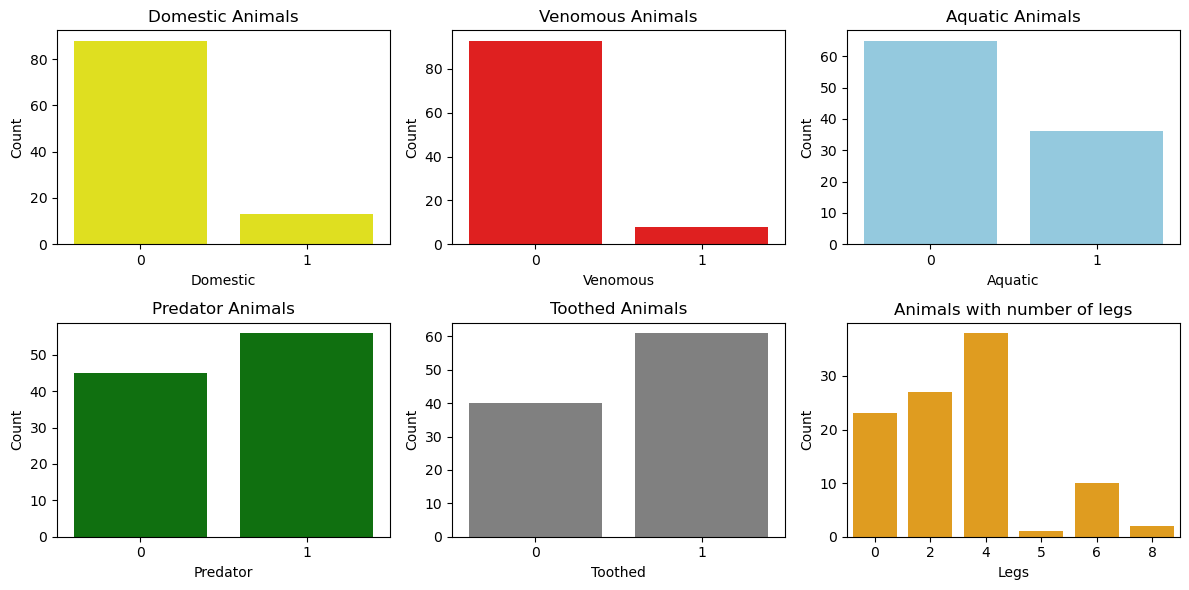

In [116]:
#plt.figure(figsize=(4,3))
fig, axes = plt.subplots(2,3, figsize=(12,6))

sns.countplot(x=df['domestic'], color='yellow', ax=axes[0, 0])
axes[0,0].set_title('Domestic Animals')
axes[0,0].set_xlabel('Domestic')
axes[0,0].set_ylabel('Count')

sns.countplot(x=df['venomous'], color='red', ax=axes[0,1])
axes[0,1].set_title('Venomous Animals')
axes[0,1].set_xlabel('Venomous')
axes[0,1].set_ylabel('Count')

sns.countplot(x=df['aquatic'], color='skyblue', ax=axes[0,2])
axes[0,2].set_title('Aquatic Animals')
axes[0,2].set_xlabel('Aquatic')
axes[0,2].set_ylabel('Count')

sns.countplot(x=df['predator'], color='green', ax=axes[1,0])
axes[1,0].set_title('Predator Animals')
axes[1,0].set_xlabel('Predator')
axes[1,0].set_ylabel('Count')

sns.countplot(x=df['toothed'], color='grey', ax=axes[1,1])
axes[1,1].set_title('Toothed Animals')
axes[1,1].set_xlabel('Toothed')
axes[1,1].set_ylabel('Count')

sns.countplot(x=df['legs'], color='orange', ax=axes[1,2])
axes[1,2].set_title('Animals with number of legs')
axes[1,2].set_xlabel('Legs')
axes[1,2].set_ylabel('Count')

plt.tight_layout()
plt.show()

<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* From the count plots, we can see the domestic and venomous animals are very less.
* There are moderate number of aquatic animals
* Most of the animals fall into predator and toothed features
* Most of the animals have 4 legs, followed by 2 legs animals and having no legs animlas which can be considered aquatic animals  

<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

<Axes: >

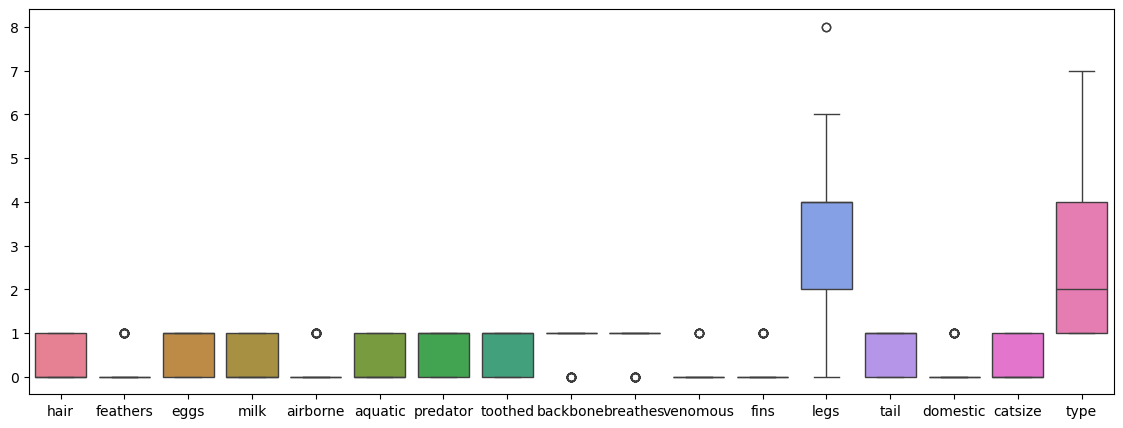

In [117]:
plt.figure(figsize=(14,5))
sns.boxplot(df, fill=True)

<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* Most of the features have binary categories, some of the data points in the features are considering as outliers but it does not needed treatment.
* Legs column shows outliers present at 8 legs value, but the animals with 8 legs does exists, which are the real data for animals. So we will keep these outliers 
* We will keep these outliers, it is just showing imbalaced data points, this will not effect much on the model so we will keep them as it is.

<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

### Separating input features and target feature

In [118]:
## Droping categorial column
df = df.drop(columns=['animal name'])

In [119]:
X = df.iloc[:,:-1]
y = df['type']

### Train Test Split

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [121]:
X_train.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
89,0,0,1,0,0,1,0,1,1,1,0,0,4,0,0,0
26,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0
42,0,0,1,0,1,0,1,0,0,1,0,0,6,0,0,0
70,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1
15,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0


### Model Training

In [122]:
## n_neighbours = 5 defaut values
knn_model = KNeighborsClassifier()

In [123]:
knn_model = knn_model.fit(X_train, y_train)

In [124]:
y_pred = knn_model.predict(X_test)

In [125]:
accuracy = accuracy_score(y_test, y_pred)
presicion = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [127]:
print(f"Accuracy Score : {accuracy:.4f}")
print("------------------------------------")
print(f"Precision Score : {presicion:.4f}")
print("------------------------------------")
print(f"Recall Score : {recall:.4f}")
print("------------------------------------")
print(f"F1 Score : {f1:.4f}")
print("------------------------------------")
print(f"Confusion Matrics : \n {cm}")
print("------------------------------------")
print(f"Classifiaction Report : \n {cr}")

Accuracy Score : 0.9048
------------------------------------
Precision Score : 0.7500
------------------------------------
Recall Score : 0.8194
------------------------------------
F1 Score : 0.7705
------------------------------------
Confusion Matrics : 
 [[11  0  0  1  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]
------------------------------------
Classifiaction Report : 
               precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.90        21
   macro avg       0.75      0.82      0.77        21
weighted avg       0.90      0.90      0.90        21



<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* The KNN is giving good accuracy score around 90% with default n_neighbours as 5 and without tuning parameters or using distance metric
* F1 Score around 77% which is quiet good. We will tune the model with different parameters and check the possible good combination of the parameters

<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

### Hyper Parameter Tuning

In [128]:
n_neighbors = np.array(range(3,40))
params = {
    'n_neighbors' : n_neighbors,
    'metric' : ['euclidean', 'minkowski']
}

In [129]:
from sklearn.model_selection import GridSearchCV

In [130]:
model = KNeighborsClassifier()
gridcv = GridSearchCV(model, param_grid=params, cv=5)

In [131]:
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'minkowski'],
                         'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39])})

In [132]:
y_pred_tuned = gridcv.predict(X_test)

In [133]:
print(gridcv.best_score_)
print(gridcv.best_params_)
print(gridcv.best_estimator_)

0.9
{'metric': 'euclidean', 'n_neighbors': 3}
KNeighborsClassifier(metric='euclidean', n_neighbors=3)


In [134]:
accuracy = accuracy_score(y_test, y_pred_tuned)
presicion = precision_score(y_test, y_pred_tuned, average='macro')
recall = recall_score(y_test, y_pred_tuned, average='macro')
f1 = f1_score(y_test, y_pred_tuned, average='macro')
cm = confusion_matrix(y_test, y_pred_tuned)
cr = classification_report(y_test, y_pred_tuned)

In [135]:
print(f"Accuracy Score : {accuracy:.4f}")
print("------------------------------------")
print(f"Precision Score : {presicion:.4f}")
print("------------------------------------")
print(f"Recall Score : {recall:.4f}")
print("------------------------------------")
print(f"F1 Score : {f1:.4f}")
print("------------------------------------")
print(f"Confusion Matrics : \n {cm}")
print("------------------------------------")
print(f"Classifiaction Report : \n {cr}")

Accuracy Score : 0.9524
------------------------------------
Precision Score : 0.7778
------------------------------------
Recall Score : 0.8333
------------------------------------
F1 Score : 0.8000
------------------------------------
Confusion Matrics : 
 [[12  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]
------------------------------------
Classifiaction Report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* Aftre hyper parameter tuning, with different k values and distance metric. The best K value is 3 and distance metric is euclidean distance metric. Which is giving good accuracy score around 95% which is very good.
* The F1 score is 80% whch is also good, indicating a well balanced performance, with high precision and high recall.

<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

### Training Accuracy and Testign Accuracy

In [139]:
## Predicting on Ytrain to check train accuracy
y_train_tuned = gridcv.predict(X_train)

In [140]:
train_accuracy = accuracy_score(y_train, y_train_tuned)
test_accuracy = accuracy_score(y_test, y_pred_tuned)

In [147]:
print(f"Train Accuracy : {train_accuracy:.2f}")
print(f"Test Accuracy : {test_accuracy:.2f}")

Train Accuracy : 0.99
Test Accuracy : 0.95


<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* The training accuracy is 99% and testing accuracy is 95%. This means model is predicting correct for new test data.
* The model is generelized model. 

<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

### Visualize the decision boundaries of the classifier.

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

In [83]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [84]:
# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [148]:
def knn_decision_boundries(X_data, y, k):
    ## KNN Model Building
    knn_model = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
    knn_model.fit(X_data, y)

    plot_decision_regions(X_data, y, clf=knn_model)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title("KNN with k="+ str(k))
    plt.show()    

In [149]:
y_target = np.array(y)
y_target

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2], dtype=int64)

### Checking Decision Boundries with different K Values

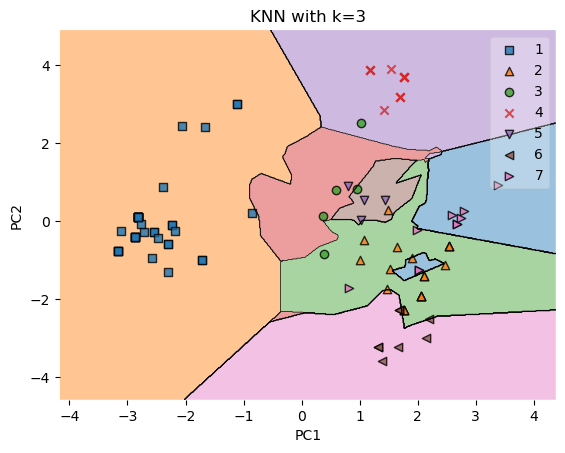

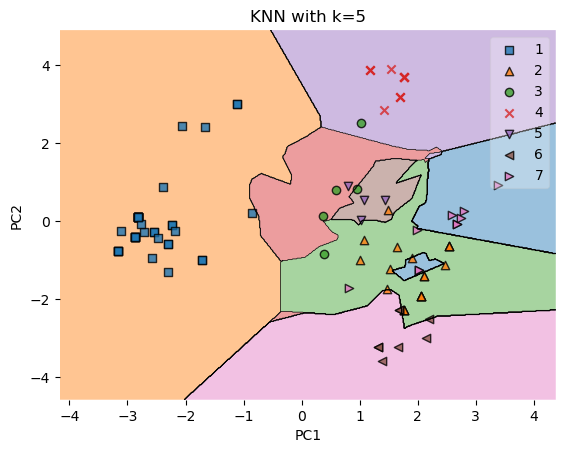

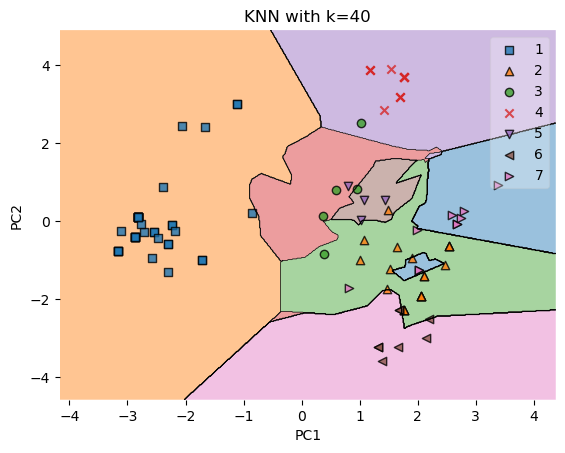

In [150]:
k_values = [3,5,40]

for k in k_values:
    knn_decision_boundries(X_pca, y_target, k)
    

### Effect of K value with weighted distance

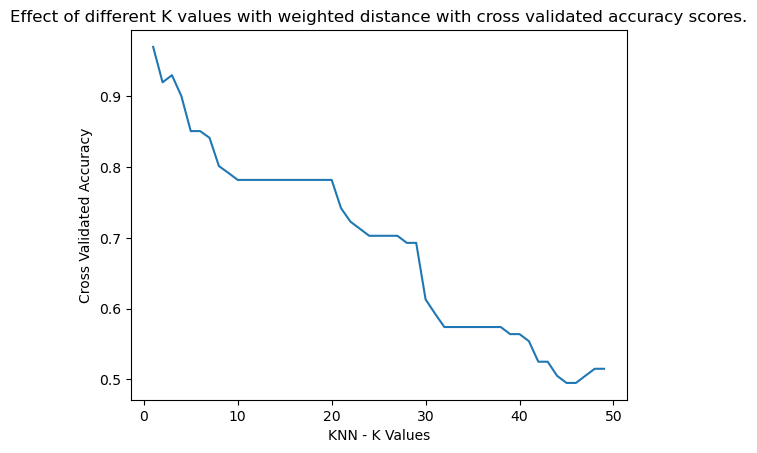

In [103]:
k_values = range(1, 50)
k_scores = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    scores = cross_val_score(knn, X, y, cv=5)
    k_scores.append(scores.mean())

## Plotting K values and K Score
plt.plot(k_values, k_scores)
plt.xlabel('KNN - K Values')
plt.ylabel('Cross Validated Accuracy')
plt.title('Effect of different K values with weighted distance with cross validated accuracy scores.')
plt.show()

<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* The K values from 1 to 10 are the best k values, which is giveing the high accuracy scores.
* Lesser K values are giving best accuracy for the model
* The K values between 10 to 20 giving the constant accuracy scores.
* The K values above the 20 we can drop as the accuracy scores are decreasing when the k value is increased.

<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px">Interview Questions :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

### 1.What are the key hyperparameters in KNN?

=> The key hyperparameters in KNN are the number of neighbors (K), the distance metric, and the weighting of neighbors.
Other important parameters include the algorithm used for nearest-neighbor search and the leaf size.
* K : is the most important hyperparameter, which determines how many neighbors participate in voting/averaging.
* Distance Metric : Defines how distance is calculated between points. Euclidean distance (default), other metrics can be used, manhattan, minkowski and hamming.
* Weights (Uniform vs Distance-based) : 
     * Uniform: all neighbors contribute equally
     * Distance: closer neighbors have higher influence. Distance weighting often improves accuracy.
* Algorithm for Neighbor Search : Used to speed up lookup like brute (brute force search), kd_tree, ball_tree.
* Leaf Size : Affects speed of construction and query.
    
#### 2.What distance metrics can be used in KNN?

=> KNN commonly uses Euclidean, Manhattan, and Minkowski distances.
Depending on the data type, it can also use Hamming distance for categorical data, cosine similarity for text or high-dimensional data.

<hr style="height:3px;border:none;color:#008000;background-color:#008000;">